In [119]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.grid_search import GridSearchCV
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import cross_validation

%matplotlib inline


## Dataset preparation

In [120]:
index_ds = pd.read_csv('./index_ds.csv', index_col='Study.Num')

In [121]:
readability = pd.read_csv('./features/readability.csv', index_col='Study.Num')
references = pd.read_csv('./features/references.csv', index_col='name')

In [122]:
liwc_features = ['Analytic',
'Clout',
'Authentic',
'Tone',
'WPS',
'Sixltr',
'Dic',
'function.',
'pronoun',
'ppron',
'i',
'we',
'you',
'shehe',
'they',
'ipron',
'prep',
'adverb',
'conj',
'negate',
'compare',
'number',
'quant',
'cogproc',
'insight',
'cause',
'discrep',
'tentat',
'certain',
'differ']

In [123]:
drop_cols = []
for col in index_ds.columns:
    if (col not in liwc_features) and (col!='replicate'):
        drop_cols.append(col)

In [124]:
index_ds = index_ds.drop(drop_cols,1)

In [125]:
index_ds.shape

(118, 31)

In [126]:
ds = index_ds.merge(readability, left_index=True, right_index=True)
ds = ds.merge(references, left_index=True, right_index=True)

In [127]:
results = pd.DataFrame(columns=['acc', 'classifier'])

## Ridge Classifier

In [301]:
N = 100
accuracy = []
alpha = []

In [302]:
lr = RidgeClassifier()
params = {'alpha':np.logspace(-5,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)

In [303]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.alpha)
    

In [131]:
res = pd.DataFrame([accuracy, ['ridge']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

In [315]:
gs

GridSearchCV(cv=None, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'alpha': array([  1.00000e-05,   1.88739e-05,   3.56225e-05,   6.72336e-05,
         1.26896e-04,   2.39503e-04,   4.52035e-04,   8.53168e-04,
         1.61026e-03,   3.03920e-03,   5.73615e-03,   1.08264e-02,
         2.04336e-02,   3.85662e-02,   7.27895e-02,   1.37382e-01,
         2....    4.17532e+01,   7.88046e+01,   1.48735e+02,   2.80722e+02,
         5.29832e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

SyntaxError: invalid syntax (<ipython-input-310-f704c1a6eade>, line 1)

## Logistic L2

In [132]:
N = 100
accuracy = []
alpha = []

In [133]:
lr = LogisticRegression(penalty='l2')
params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)

In [134]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [135]:
res = pd.DataFrame([accuracy, ['logistic_l2']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Logistic L1

In [136]:
lr = LogisticRegression(penalty='l1')
params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)
N = 50
accuracy = []
alpha = []

In [137]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [138]:
res = pd.DataFrame([accuracy, ['logistic_l1']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Linear SVC

In [139]:
N = 100
accuracy = []
alpha = []

lr = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
          fit_intercept=True, intercept_scaling=1, 
          class_weight=None, verbose=0, random_state=None, 
          max_iter=1000)

params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)


In [140]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [141]:
res = pd.DataFrame([accuracy, ['linear_SVC']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## SVC

In [142]:
N = 100
accuracy = []
alpha = []

lr = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
         probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
         max_iter=-1, decision_function_shape=None, random_state=None)

params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4, cv=10)

In [143]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [144]:
res = pd.DataFrame([accuracy, ['SVC_radial']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

# Ensemble

## Random Forest

In [145]:
N = 100
accuracy = []
alpha = []

lr = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                            n_jobs=4, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [146]:
for i in range(N):
    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)


In [147]:
res = pd.DataFrame([accuracy, ['random_forest']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Adaboost

In [148]:
N = 100
accuracy = []
alpha = []

lr = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)


In [149]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    

In [150]:
res = pd.DataFrame([accuracy, ['Adaboost']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Gradient Boosting

In [151]:
N = 100
accuracy = []
alpha = []

lr = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_depth=3, init=None, random_state=None, max_features=None, verbose=0,
                                max_leaf_nodes=None, warm_start=False, presort='auto')
lr.fit(X_train, y_train)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [152]:
for i in range(N):
    
    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)

In [153]:
res = pd.DataFrame([accuracy, ['Gradient_Boosting']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Results

In [ ]:
for i in range(len(results.classifier.unique())):
    
    x = np.random.normal(i, 0.04, size=N)
    y = results.acc[results.classifier == classifiers[i]].dropna()
    
    plot(x, y, 'r.', alpha=0.2)

In [311]:
final = pd.DataFrame(columns = results.classifier.unique())
for clas in results.classifier.unique():
    tmp = results[results.classifier == clas].acc
    tmp.index = np.arange(len(tmp))    
    final.loc[:,clas] = tmp
    
    


In [296]:
means = final.drop(['logistic_l1', 'SVC_radial', 'random_forest'],1).mean()

In [297]:
std = final.drop(['logistic_l1', 'SVC_radial', 'random_forest'],1).std()

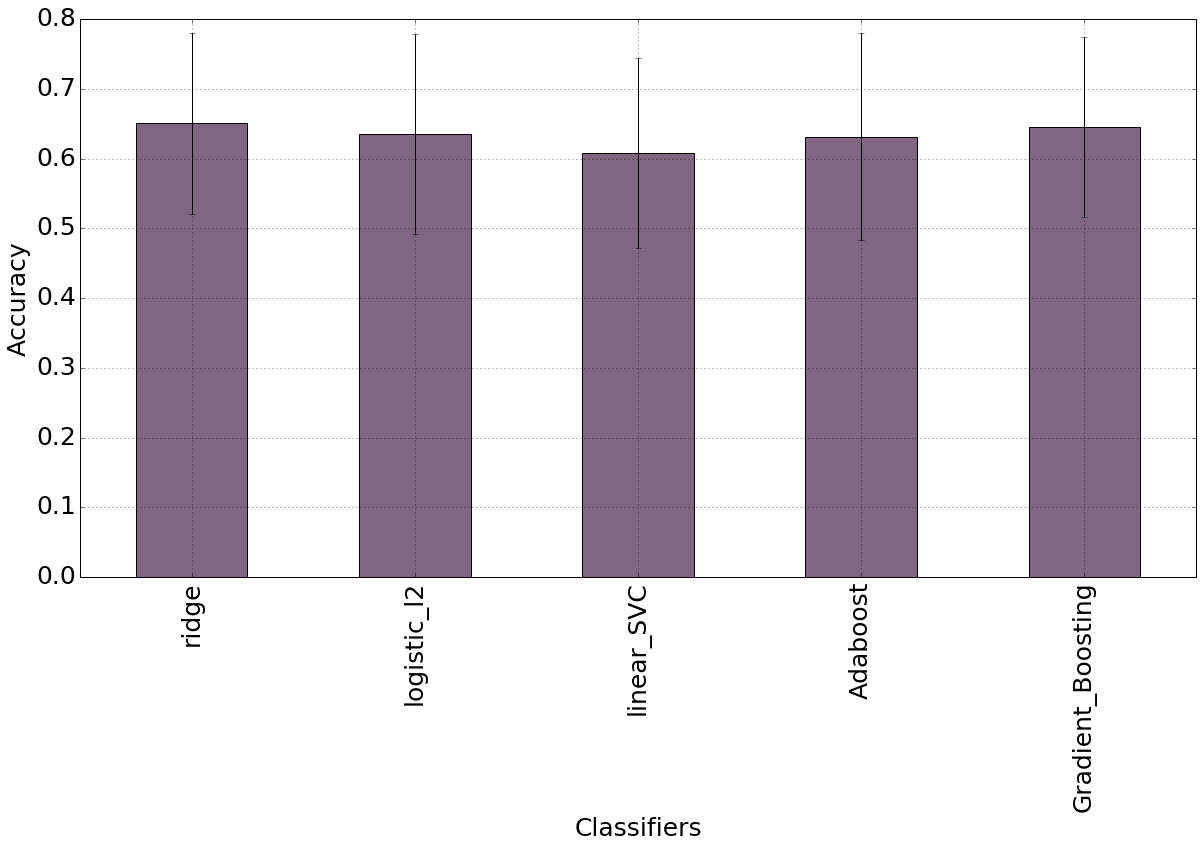

In [298]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Classifiers', fontsize=25)
means.plot.bar(yerr=std, ax=ax, color=(0.5,0.4,0.5), fontsize=25, grid=True)

In [299]:
means = pd.Series([.68,.65, .62], index=['Naive Bayes', 'SVM TFIDF', 'SVM DFM'])
std = pd.Series([.13, .13, .14],index=['Naive Bayes', 'SVM TFIDF', 'SVM DFM'])

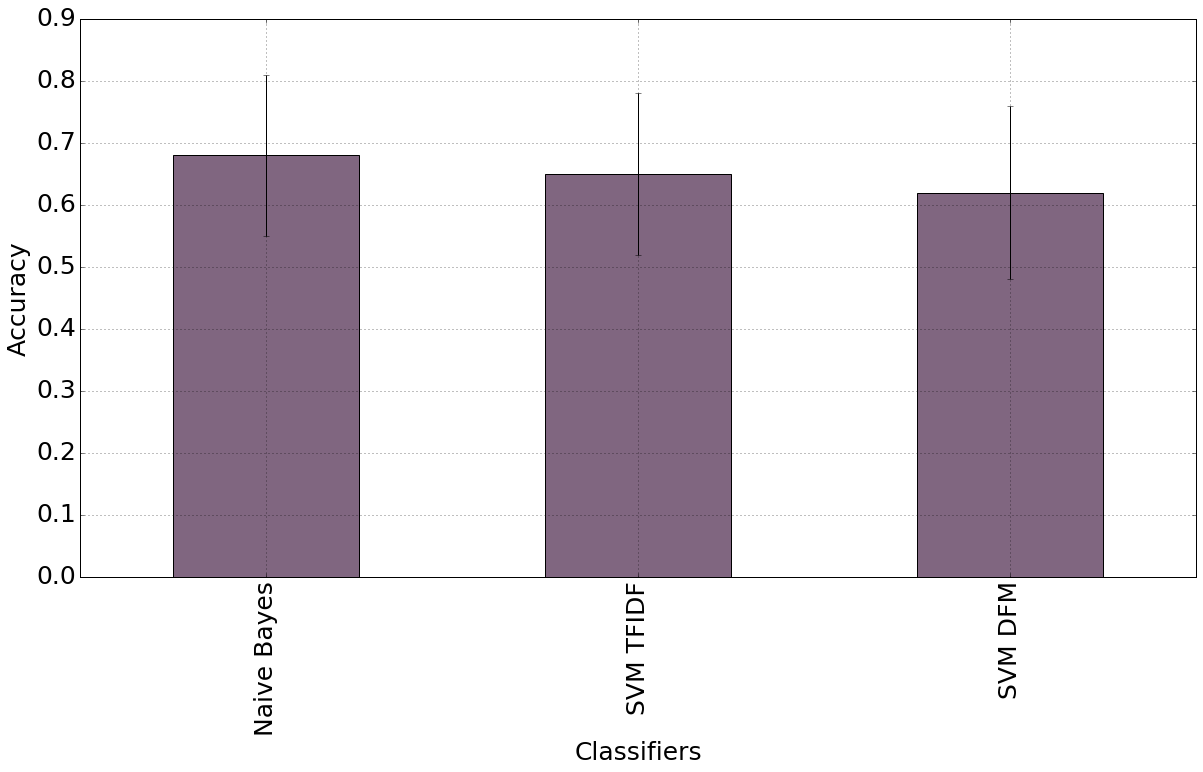

In [300]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Classifiers', fontsize=25)

means.plot.bar(yerr=std, ax=ax, color=(0.5,0.4,0.5), fontsize=25, grid=True)

## Ridge feature importance

In [318]:
lr = RidgeClassifier()
params = {'alpha':np.logspace(-5,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)

coefs = []

In [320]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    coefs.append(gs.best_estimator_.coef_)
    

In [359]:
features = ds.drop('replicate',1).columns

In [336]:
coefs_array = np.array([x[0] for x in coefs])
coefs_ds = pd.DataFrame(coefs_array)
coefs_sum = np.abs(coefs_ds).sum()

In [360]:
coefs_sum.index = features

In [369]:
coefs_sum.sort_values(ascending=False)[1:10]

i          1255.466658
we         1236.214745
they       1206.595188
shehe      1199.359474
you        1172.457431
ipron       637.496550
pronoun     634.866243
cause        32.348822
cogproc      30.105413
dtype: float64

In [366]:
np.sort?

In [347]:
coefs_abs.sum()

0        9.466394
1        1.432184
2        0.429843
3        0.990664
4        1.475195
5        2.576890
6       10.997367
7        2.838716
8      634.866243
9     1876.309896
10    1255.466658
11    1236.214745
12    1172.457431
13    1199.359474
14    1206.595188
15     637.496550
16      27.003025
17       9.057597
18       4.564944
19      20.310042
20      12.030358
21       2.996093
22      20.299795
23      30.105413
24      23.991567
25      32.348822
26      12.158852
27      10.643013
28      10.988773
29       5.901316
30       1.275287
31       0.417664
32       0.230046
33       0.776569
dtype: float64